# Simple Linear Regression Q1

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model. 

Delivery_time -> Predict delivery time using sorting time.

use delivery_time.csv


### Steps :

1. Import new data set:
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
    - check for linearity and relationship between the 'x' and 'y'.
2. Correlation analysis
    - check corr()
    - check distribution of x and y.
3. Fitting a Linear Regression Model
    - train the model => fit()
    - check model summary.
    - check Rsqr and AIC values. 
4. Perform necessary Outliner detection and elimination functions if required. 
5. Predict for new data points. 



### Import new dataset

In [3]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/Admin/Documents/Assignments/Assignment 4/4Q1\delivery_time.csv")
data.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, inplace = True)

In [4]:
data.info() #There are no null values in this dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data['sorting_time'] = data['sorting_time'].astype(float)
data

,delivery_time,sorting_time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [6]:
data.shape

(21, 2)

In [7]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report.html') 
#Report reveals no null values and very high correlation between delivery time and sorting time

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

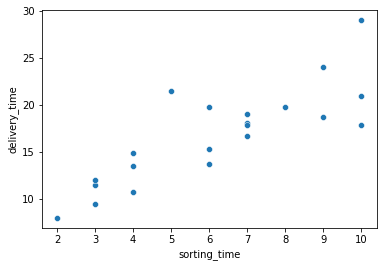

In [9]:
#View visualisations for both x and y
sns.scatterplot(x=data["sorting_time"],y=data["delivery_time"])

<function matplotlib.pyplot.show(close=None, block=None)>

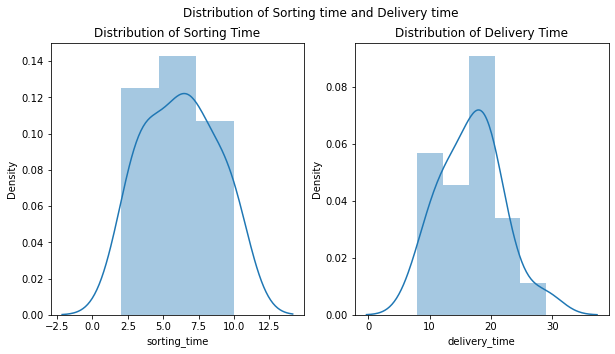

In [10]:
#DistPlot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of Sorting time and Delivery time')

#Sorting Time
sns.distplot(data['sorting_time'],ax=axes[0])
axes[0].set_title('Distribution of Sorting Time')

#Delivery Time
sns.distplot(data['delivery_time'],ax=axes[1])
axes[1].set_title('Distribution of Delivery Time')

plt.show

### Correlation Analysis

In [11]:
data.corr() # There is a descent correlation between sorting time and delivery time

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


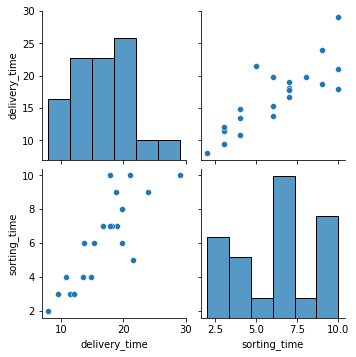

In [12]:
sns.pairplot(data) #There is good linear relation.

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

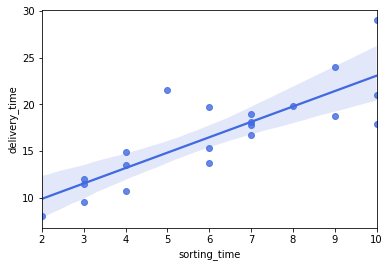

In [13]:
sns.regplot(x="sorting_time", y="delivery_time", data=data, color='royalblue')

### Fitting a Linear Regression Model

#### Using Skit-Learn Linear Regression
This library isnt as good as the statsmodel one for first time learning and analysing p-values. 

In [14]:
y = data['delivery_time']
X = [[x] for x in data['sorting_time']]
X #For Skitlearn Library, data needs to be in this format to work.

[[10.0],
 [4.0],
 [6.0],
 [9.0],
 [10.0],
 [6.0],
 [7.0],
 [3.0],
 [10.0],
 [9.0],
 [8.0],
 [4.0],
 [7.0],
 [3.0],
 [3.0],
 [4.0],
 [6.0],
 [7.0],
 [2.0],
 [7.0],
 [5.0]]

In [15]:
model1 = LinearRegression() #This library does not give proper parameters for testing as in p-values, AIC, Adj R Sqr. 
model1.fit(X,y)

LinearRegression()

In [16]:
model1.score(X, y) #R-Sqr Value R-Value is very poor.

0.6822714748417231

In [17]:
model1.intercept_ #B0 value

6.58273397199706

In [18]:
test_sort = np.array([[5.5]])
model1.predict(test_sort) #Predicting Delivery time for Sorting time = 5.5

array([15.6523434])

#### Using statsmodels library

In [19]:
import statsmodels.formula.api as smf
model2 = smf.ols("delivery_time~sorting_time",data = data).fit()

In [20]:
model2.summary() 
#R-Sqr value is poor
#p-values reveal that delivery time and sorting time are very dependent. Default alternate hypothesis is accepted

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        15:48:21   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Coefficients
model2.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
#t and p-Values
print(model2.tvalues) 

Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [23]:
print(model2.pvalues)  

Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [24]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [25]:
test_sort1 = pd.Series([3.5,7.5])
data_pred=pd.DataFrame(test_sort1,columns=['sorting_time'])
model2.predict(data_pred)

0    12.354304
1    18.950383
dtype: float64

### Model Improvement and Outlier Elimination

<AxesSubplot:>

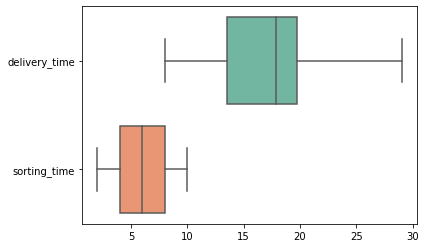

In [26]:
sns.boxplot(data=data, orient="h", palette="Set2") #There are no extreme outliers in this case. 

### Result

The model has been created for predicting delivery time from sorting time. However, the variance valueis only 68% which is not very ideal model. The sample size needs to be increased to further improve this model. 